
# **CSCI 4343 Data Science Group Project (Group 6)**

* This Colab notebook is part of our academic group project for the course **CSCI 4343 - Data Science.**
* Our topic is: **"Identifying Factors Affecting Muslim Marriage Success Using Data Analysis"**
* To support this, we used the **Divorce Predictors Dataset from Kaggle** as a secondary dataset to analyze general marriage trends using machine learning and data visualization techniques.


  




DATASET COLUMNS DETAIL (1 - 55)


1. If one of us apologizes when our discussion deteriorates, the discussion ends.
2. I know we can ignore our differences, even if things get hard sometimes.
3. When we need it, we can take our discussions with my spouse from the beginning and correct it.
4. When I discuss with my spouse, to contact him will eventually work.
5. The time I spent with my wife is special for us.
6. We don't have time at home as partners.
7. We are like two strangers who share the same environment at home rather than family.
8. I enjoy our holidays with my wife.
9. I enjoy traveling with my wife.
10. Most of our goals are common to my spouse.
11. I think that one day in the future, when I look back, I see that my spouse and I have been in harmony with each other.
12. My spouse and I have similar values in terms of personal freedom.
13. My spouse and I have similar sense of entertainment.
14. Most of our goals for people (children, friends, etc.) are the same.
15. Our dreams with my spouse are similar and harmonious.
16. We're compatible with my spouse about what love should be.
17. We share the same views about being happy in our life with my spouse
18. My spouse and I have similar ideas about how marriage should be
19. My spouse and I have similar ideas about how roles should be in marriage
20. My spouse and I have similar values in trust.
21. I know exactly what my wife likes.
22. I know how my spouse wants to be taken care of when she/he sick.
23. I know my spouse's favorite food.
24. I can tell you what kind of stress my spouse is facing in her/his life.
25. I have knowledge of my spouse's inner world.
26. I know my spouse's basic anxieties.
27. I know what my spouse's current sources of stress are.
28. I know my spouse's hopes and wishes.
29. I know my spouse very well.
30. I know my spouse's friends and their social relationships.
31. I feel aggressive when I argue with my spouse.
32. When discussing with my spouse, I usually use expressions such as ‘you always’ or ‘you never’ .
33. I can use negative statements about my spouse's personality during our discussions.
34. I can use offensive expressions during our discussions.
35. I can insult my spouse during our discussions.
36. I can be humiliating when we discussions.
37. My discussion with my spouse is not calm.
38. I hate my spouse's way of open a subject.
39. Our discussions often occur suddenly.
40. We're just starting a discussion before I know what's going on.
41. When I talk to my spouse about something, my calm suddenly breaks.
42. When I argue with my spouse, ı only go out and I don't say a word.
43. I mostly stay silent to calm the environment a little bit.
44. Sometimes I think it's good for me to leave home for a while.
45. I'd rather stay silent than discuss with my spouse.
46. Even if I'm right in the discussion, I stay silent to hurt my spouse.
47. When I discuss with my spouse, I stay silent because I am afraid of not being able to control my anger.
48. I feel right in our discussions.
49. I have nothing to do with what I've been accused of.
50. I'm not actually the one who's guilty about what I'm accused of.
51. I'm not the one who's wrong about problems at home.
52. I wouldn't hesitate to tell my spouse about her/his inadequacy.
53. When I discuss, I remind my spouse of her/his inadequacy.
54. I'm not afraid to tell my spouse about her/his incompetence.
55. Divorce Y/N (1/0)



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score


# 1. LOAD DATASET

In [ ]:
df = pd.read_csv('divorce_data.csv', sep=';')
print("Shape of the dataset:", df.shape)
df.head()


Shape of the dataset: (170, 55)


,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Divorce
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


# 2. Visualize data balance (Class Distribution plot)
- Visualizes the balance between divorced (1) and non-divorced (0) cases using a bar chart, and prints actual counts and percentages to ensure balanced data.



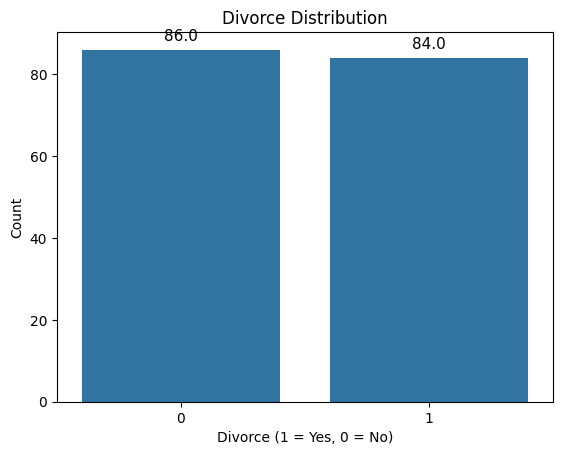

Divorce
0    86
1    84
Name: count, dtype: int64
Divorce
0    50.588235
1    49.411765
Name: proportion, dtype: float64


In [ ]:
sns.countplot(x='Divorce', data=df)
plt.title('Divorce Distribution')
plt.xlabel('Divorce (1 = Yes, 0 = No)')
plt.ylabel('Count')

# Annotate bar values
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=11, color='black', xytext=(0, 10),
                       textcoords='offset points')
plt.show()

print(df['Divorce'].value_counts())
print(df['Divorce'].value_counts(normalize=True) * 100)


# 3. CHECK FOR MISSING VALUE & DATA TYPES
- To make sure the quality of data before processing.

In [ ]:
print("Missing value per column:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)


Missing value per column:
 Q1         0
Q2         0
Q3         0
Q4         0
Q5         0
Q6         0
Q7         0
Q8         0
Q9         0
Q10        0
Q11        0
Q12        0
Q13        0
Q14        0
Q15        0
Q16        0
Q17        0
Q18        0
Q19        0
Q20        0
Q21        0
Q22        0
Q23        0
Q24        0
Q25        0
Q26        0
Q27        0
Q28        0
Q29        0
Q30        0
Q31        0
Q32        0
Q33        0
Q34        0
Q35        0
Q36        0
Q37        0
Q38        0
Q39        0
Q40        0
Q41        0
Q42        0
Q43        0
Q44        0
Q45        0
Q46        0
Q47        0
Q48        0
Q49        0
Q50        0
Q51        0
Q52        0
Q53        0
Q54        0
Divorce    0
dtype: int64

Data types:
 Q1         int64
Q2         int64
Q3         int64
Q4         int64
Q5         int64
Q6         int64
Q7         int64
Q8         int64
Q9         int64
Q10        int64
Q11        int64
Q12        int64
Q13        int64
Q14       

# 4. EXPLORATORY DATA ANALYSIS (EDA) (Correlation Heatmap)
- Plot heatmap to show features are correlated with each other and the target variable

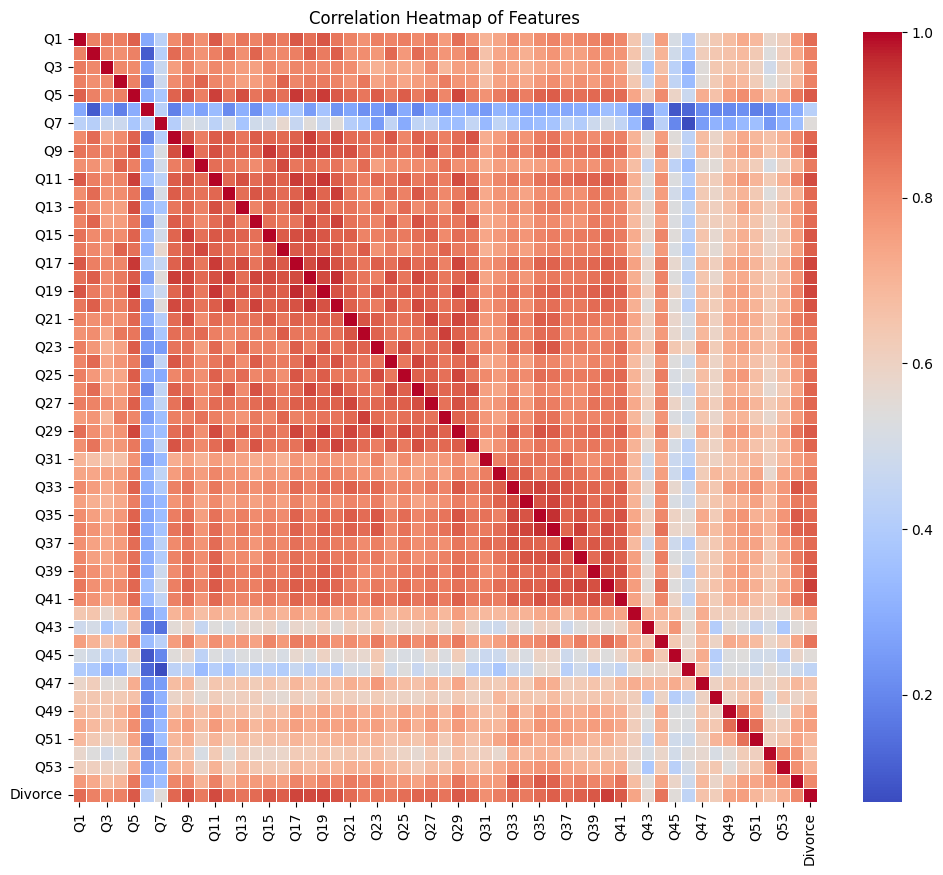

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()


# 5. Define Features (X) and Target (y)
- We separate the independent variables (X) from the dependent variable (y = Divorce).

# 6. Split the dataset into training and testing sets
- We use 80% of the data for training and 20% for testing.

In [ ]:
X = df.drop('Divorce', axis=1)
y = df['Divorce']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 7. Train the Random Forest Classifier
- This ensemble model creates multiple decision trees and combines them for better accuracy.

# 8. Make predictions on the test set
- We predict both the classes and probabilities (needed for ROC curve).

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]


# 9. Evaluate the model
- We evaluates the model's performance using standard metrics like accuracy, precision, recall, and F1-score.

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9705882352941176

Confusion Matrix:
 [[14  0]
 [ 1 19]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.95      0.97        20

    accuracy                           0.97        34
   macro avg       0.97      0.97      0.97        34
weighted avg       0.97      0.97      0.97        34



# 10. Confusion Matrix Plot
- Visualizes how well the model classified divorced vs. non-divorced individuals by comparing predicted and actual results.

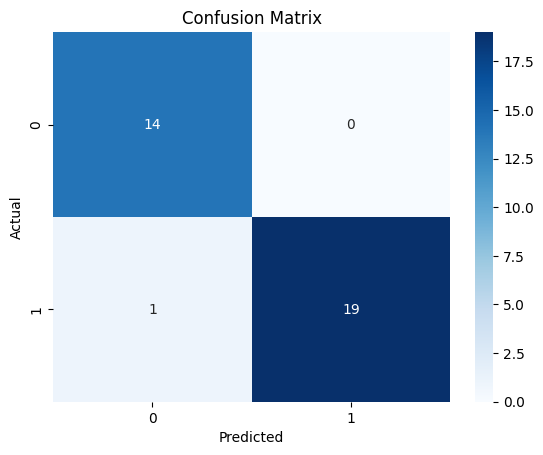

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# 11. Plot ROC Curve to visualize model's performance
- Plots the ROC curve and calculates the AUC score to measure the model's ability to distinguish between classes.




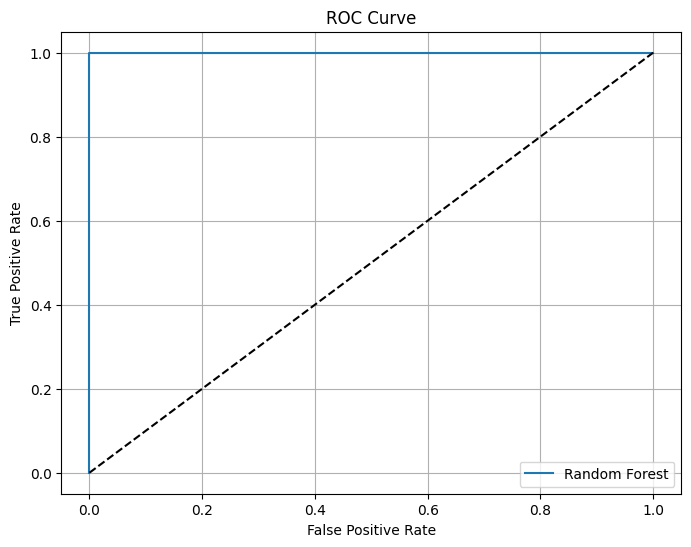

AUC Score: 1.0


In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label="Random Forest")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

print("AUC Score:", roc_auc_score(y_test, y_proba))


# 12. Analyze and visualize feature importance (TOP 10)
- We identify which features contribute most to the model's predictions.

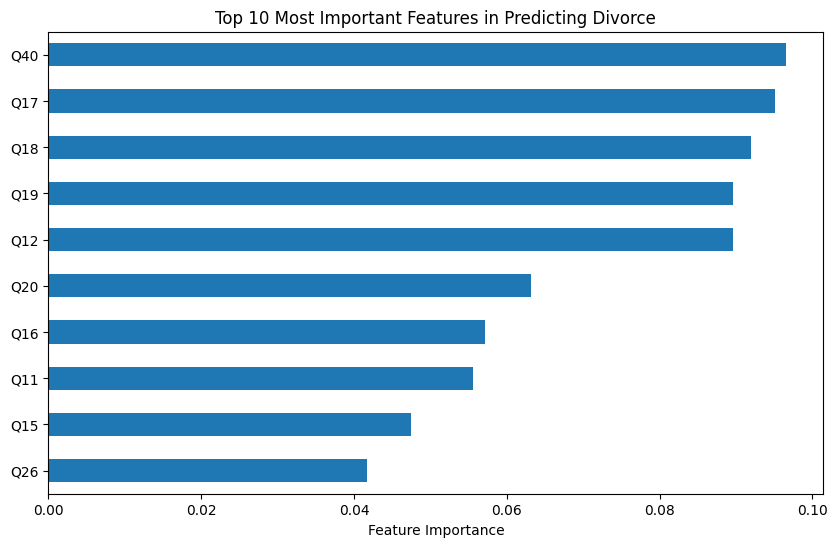

In [ ]:
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
top_features = feature_importance.nlargest(10)

plt.figure(figsize=(10,6))
top_features.plot(kind='barh')
plt.title("Top 10 Most Important Features in Predicting Divorce")
plt.xlabel("Feature Importance")
plt.gca().invert_yaxis()
plt.show()


# 13. Stratified K-Fold Cross Validation
- Applies 5-fold cross-validation to ensure that the model’s accuracy is stable and not dependent on one specific data split.

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf_cv = RandomForestClassifier(n_estimators=100, random_state=42)
cv_scores = cross_val_score(rf_cv, X, y, cv=cv, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())
print("Std Deviation:", cv_scores.std())


Cross-Validation Scores: [0.97058824 1.         1.         0.97058824 0.94117647]
Mean Accuracy: 0.9764705882352942
Std Deviation: 0.022009749333964365


# 14. Correlation Table of All Features vs Divorce
- Get correlation of all Q-features with target variable (Divorce)

In [ ]:
correlations = df.corr()['Divorce'].drop('Divorce').sort_values(ascending=False)
print("Top 10 Positively Correlated Questions:\n", correlations.head(10))
print("Top 10 Negatively Correlated Questions:\n", correlations.tail(10))


Top 10 Positively Correlated Questions:
 Q40    0.938684
Q17    0.929346
Q19    0.928627
Q18    0.923208
Q11    0.918386
Q9     0.912368
Q20    0.907008
Q15    0.901220
Q39    0.896180
Q41    0.894356
Name: Divorce, dtype: float64
Top 10 Negatively Correlated Questions:
 Q53    0.711176
Q51    0.692681
Q47    0.656409
Q52    0.651478
Q48    0.619830
Q43    0.566242
Q45    0.546450
Q7     0.544835
Q46    0.443465
Q6     0.420913
Name: Divorce, dtype: float64


# 15. Mean Comparison Table
- Shows average responses for each question grouped by divorced vs. non-divorced respondents, helping identify behavioral differences.



In [ ]:
all_questions = [f'Q{i}' for i in range(1, 55)]
mean_scores = df.groupby('Divorce')[all_questions].mean().T
mean_scores.columns = ['Not Divorced (0)', 'Divorced (1)']
display(mean_scores.sort_values(by='Divorced (1)', ascending=False))


,Not Divorced (0),Divorced (1)
Q39,0.569767,3.642857
Q37,0.627907,3.583333
Q40,0.209302,3.571429
Q41,0.476744,3.547619
Q49,1.279070,3.511905
Q50,1.383721,3.500000
Q52,1.569767,3.488095
Q43,1.953488,3.476190
Q48,2.046512,3.452381
Q31,0.837209,3.440476


# 16. Visualize Top 5 Mean Differences
- we plots the five questions with the largest average score difference between divorced and non-divorced groups to visually highlight contrast.



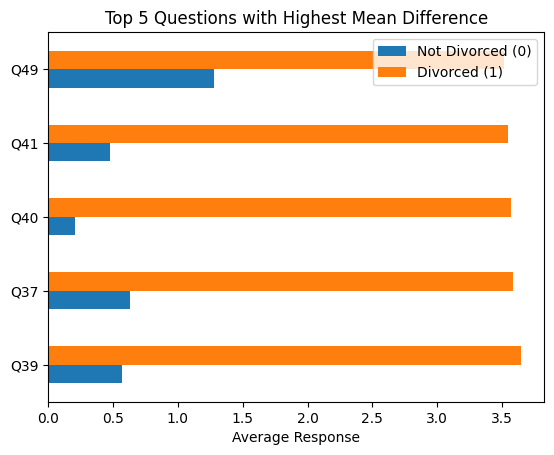

In [ ]:
top_diff = mean_scores.sort_values(by='Divorced (1)', ascending=False).head(5)
top_diff.plot(kind='barh')
plt.title("Top 5 Questions with Highest Mean Difference")
plt.xlabel("Average Response")
plt.show()
